Task 2: Apply algorithm on digits dataset - LabelEncoding of features: and Train test Division 80%-20%

In [1]:
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
digits_dataset = pd.DataFrame(digits.data, columns = digits.feature_names)

# print the names of the 13 features
print("Features:", digits.feature_names)


# print the label type of digits
print("\nLabels:", digits.target_names)

# print data(feature)shape
print("Shape:", digits.data.shape)
# digits_dataset.head()

Features: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']

Labels: [0 1 2 3 4 5 6 7 8 9]
Shape: (1797, 64)


In [3]:
# label encoding is not required as data already numeric

#split data set into train and test sets
train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 80) # roll no 80

In [4]:
#Create a Decision Tree Classifier (using Entropy)
DT = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 80) # roll no 80

#Train the model using the training sets
final_model = DT.fit(train_x, train_y)

In [5]:
# Predict the classes of test data
prediction = DT.predict(test_x)
print("prediction:",prediction)
print(prediction.dtype)

prediction: [6 7 0 1 5 7 4 4 3 1 4 2 9 0 1 6 6 3 1 3 5 1 8 3 9 9 4 4 0 1 0 3 2 6 9 7 2
 4 0 0 7 7 1 9 7 0 1 2 4 0 3 2 4 3 9 3 5 2 0 8 2 3 9 2 1 2 1 7 6 4 2 1 4 6
 4 7 2 4 5 8 7 9 5 3 5 0 6 1 1 1 9 3 6 2 7 2 9 9 3 0 9 8 8 0 9 0 5 1 2 2 8
 4 5 2 4 4 4 6 5 4 9 3 4 2 2 4 5 9 2 6 7 9 3 4 2 2 5 4 3 9 2 3 8 9 6 3 8 0
 5 9 1 6 0 8 1 9 9 2 4 6 0 8 9 6 5 2 4 4 5 2 3 9 7 4 7 5 4 9 9 2 1 6 8 6 1
 3 4 1 0 9 0 2 3 9 5 4 2 5 4 8 4 3 2 9 2 9 8 2 4 5 1 0 9 4 9 4 0 4 5 9 9 9
 8 0 9 9 2 4 0 5 8 5 0 0 1 6 6 0 5 5 5 4 5 9 3 1 9 8 9 5 4 0 0 6 8 3 4 3 0
 9 5 0 5 5 5 8 1 6 2 2 9 9 2 3 7 1 7 4 5 8 3 6 1 9 2 2 9 5 3 7 9 1 3 3 6 5
 7 0 3 5 5 2 2 3 0 1 8 9 6 8 3 1 9 7 5 9 8 1 0 1 7 5 2 9 1 1 6 1 0 1 1 7 3
 3 8 5 2 4 5 1 9 2 5 7 3 5 2 1 5 4 6 5 1 8 2 8 5 4 3 5]
int32


In [6]:
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(test_y, prediction)
print("Accuracy:",Accuracy)

Accuracy: 0.8666666666666667


In [7]:
export_graphviz(DT,out_file='digits_tree.dot',feature_names=list(digits.feature_names),class_names=list(str(digits.target_names)), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'digits_tree.dot', '-o', 'digits_tree.png', '-Gdpi=600'], shell = True)

0

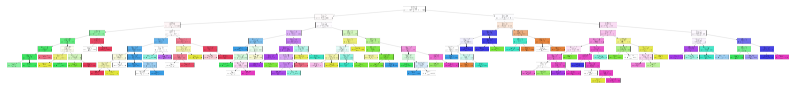

In [8]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('digits_tree.png'))

plt.axis('off')
plt.show()